In [ ]:
# https://www.kaggle.com/zalando-research/fashionmnist
!unzip '/content/zalando-mnist'

Archive:  /content/zalando-mnist.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fashion-mnist_test.csv  
replace fashion-mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fashion-mnist_train.csv  
replace t10k-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: t10k-images-idx3-ubyte  
replace t10k-labels-idx1-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: t10k-labels-idx1-ubyte  
replace train-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y\
  inflating: train-images-idx3-ubyte  
replace train-labels-idx1-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train-labels-idx1-ubyte  


# 1. Implementation using sklearn

### 1) Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report

### 2) Load and Audit the Data

In [ ]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


### 3) Prepare and Transform the Data

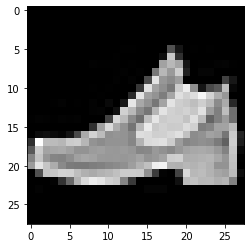

In [ ]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(1, 785)]
row_to_examine = 1
image_data = np.reshape(train[features][row_to_examine:row_to_examine+1].to_numpy(), (28, 28))
plt.imshow(image_data, cmap="gray")

In [ ]:
X = train.iloc[:, 1:]
Y = train['label']

**Split the data into train & test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


### 4) Set up the Dense Layer Model

**Implement the Single Layer Perceptron. Evaluate performance and discuss reasons of failure**

In [ ]:
#verbose: used to show specified level of detailed info while running the model
#f1-score: harmonic mean of precision and recall
per = Perceptron(verbose=1)
per.fit(X_train, y_train)
pred_per = per.predict(X_test)
cm_slp = confusion_matrix(y_test, pred_per)
clas_rep_slp = classification_report(y_test, pred_per)
print(cm_slp)
print(clas_rep_slp)

# We look for f1-score for each grayscale article image
# 0 - T-shirt/top
# 1 - Trouser
# 2 - Pullover
# 3 - Dress
# 4 - Coat
# 5 - Sandal
# 6 - Shirt
# 7 - Sneaker
# 8 - Bag
# 9 - Ankle boot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 53717.69, NNZs: 783, Bias: -79.000000, T: 48000, Avg. loss: 300315.256500
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 62354.58, NNZs: 784, Bias: -140.000000, T: 96000, Avg. loss: 297111.988625
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 71210.45, NNZs: 784, Bias: -199.000000, T: 144000, Avg. loss: 286966.761063
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 77926.15, NNZs: 783, Bias: -280.000000, T: 192000, Avg. loss: 294703.786187
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 85439.47, NNZs: 784, Bias: -372.000000, T: 240000, Avg. loss: 294710.997146
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 91029.39, NNZs: 784, Bias: -435.000000, T: 288000, Avg. loss: 287022.618167
Total training time: 0.73 seconds.
-- Epoch 7
Norm: 94805.77, NNZs: 784, Bias: -494.000000, T: 336000, Avg. loss: 287587.723562
Total training time: 0.84 seconds.
-- Epoch 8
Norm: 99334.58, NNZs: 784, Bias: -596.000000, T: 384000, Avg. loss: 288378.091500
Total training

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.1s finished


[[ 968    5   29   51   23    1   48    1   14    0]
 [   5 1176   11   32   13    0    1    0    2    1]
 [   8    1  872   21  279    0   21    0   10    0]
 [  55   14   17  958   92    0    7    1    4    1]
 [   4    1   71   35 1020    0   16    0    3    0]
 [   5    1   14    1    4  936    5  181   41   36]
 [ 207    1  199   41  382    0  341    1   35    1]
 [   0    0    0    0    0    3    0 1204    1   19]
 [   3    0    6   20   22    1    7   10 1155    0]
 [   7    0    1    1    0    8    0  104    2 1102]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1140
           1       0.98      0.95      0.96      1241
           2       0.71      0.72      0.72      1212
           3       0.83      0.83      0.83      1149
           4       0.56      0.89      0.68      1150
           5       0.99      0.76      0.86      1224
           6       0.76      0.28      0.41      1208
           7       0.80      0.98   

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# start hidden_layer_sizes from (10, 10, 10) increase the size if accuracy increases along.
mlp = MLPClassifier(hidden_layer_sizes=(16, 16, 16), verbose=1, random_state=123)
mlp.fit(X_train, y_train)
preds_mlp = mlp.predict(X_test)

Iteration 1, loss = 2.75836198
Iteration 2, loss = 2.05926874
Iteration 3, loss = 1.69778155
Iteration 4, loss = 1.37055630
Iteration 5, loss = 1.12267166
Iteration 6, loss = 0.97248131
Iteration 7, loss = 0.91205156
Iteration 8, loss = 0.84524836
Iteration 9, loss = 0.79296501
Iteration 10, loss = 0.74337076
Iteration 11, loss = 0.71696542
Iteration 12, loss = 0.69546314
Iteration 13, loss = 0.69546510
Iteration 14, loss = 0.68338394
Iteration 15, loss = 0.67338537
Iteration 16, loss = 0.66112372
Iteration 17, loss = 0.65746887
Iteration 18, loss = 0.64687416
Iteration 19, loss = 0.64582113
Iteration 20, loss = 0.64402928
Iteration 21, loss = 0.62635093
Iteration 22, loss = 0.62996345
Iteration 23, loss = 0.62425953
Iteration 24, loss = 0.61514313
Iteration 25, loss = 0.60762647
Iteration 26, loss = 0.60683339
Iteration 27, loss = 0.60072413
Iteration 28, loss = 0.59262367
Iteration 29, loss = 0.59720313
Iteration 30, loss = 0.59374554
Iteration 31, loss = 0.58475591
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
cm_mlp = confusion_matrix(y_test, preds_mlp)
clasrep_mlp = classification_report(y_test, preds_mlp)
print(cm_mlp)
print(clasrep_mlp)

[[ 851    7   10   59    6    1  193    1   11    1]
 [  13 1159    2   36   11    0   16    2    2    0]
 [   1    0  717   16  176    1  295    0    6    0]
 [  32   16    8  980   64    1   39    2    4    3]
 [   3    0   33   40  945    1  124    0    4    0]
 [   1    0    0    3    0 1105    2   52   14   47]
 [ 137    3  155   46  243    1  603    0   20    0]
 [   0    0    0    0    0   22    0 1157    1   47]
 [   2    0    4    6   18    9   24   10 1150    1]
 [   0    0    0    3    0    6    0   42    1 1173]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1140
           1       0.98      0.93      0.96      1241
           2       0.77      0.59      0.67      1212
           3       0.82      0.85      0.84      1149
           4       0.65      0.82      0.72      1150
           5       0.96      0.90      0.93      1224
           6       0.47      0.50      0.48      1208
           7       0.91      0.94   

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32), verbose=1, random_state=123)
mlp.fit(X_train, y_train)
preds_mlp = mlp.predict(X_test)

Iteration 1, loss = 2.37871041
Iteration 2, loss = 1.03289508
Iteration 3, loss = 0.79144932
Iteration 4, loss = 0.70440343
Iteration 5, loss = 0.65889663
Iteration 6, loss = 0.63591108
Iteration 7, loss = 0.61518020
Iteration 8, loss = 0.59636419
Iteration 9, loss = 0.58614978
Iteration 10, loss = 0.57207182
Iteration 11, loss = 0.57358448
Iteration 12, loss = 0.56555138
Iteration 13, loss = 0.55293098
Iteration 14, loss = 0.53923057
Iteration 15, loss = 0.52398450
Iteration 16, loss = 0.50514934
Iteration 17, loss = 0.49737977
Iteration 18, loss = 0.48402383
Iteration 19, loss = 0.47676850
Iteration 20, loss = 0.46824768
Iteration 21, loss = 0.46474263
Iteration 22, loss = 0.47365946
Iteration 23, loss = 0.44851636
Iteration 24, loss = 0.45059920
Iteration 25, loss = 0.44347485
Iteration 26, loss = 0.44806091
Iteration 27, loss = 0.43468787
Iteration 28, loss = 0.43163073
Iteration 29, loss = 0.42791434
Iteration 30, loss = 0.41447237
Iteration 31, loss = 0.41396670
Iteration 32, los

In [ ]:
cm_mlp = confusion_matrix(y_test, preds_mlp)
clasrep_mlp = classification_report(y_test, preds_mlp)
print(cm_mlp)
print(clasrep_mlp)

[[ 938    4   12   29    3    0  145    0    9    0]
 [   4 1174    4   40    6    0   10    0    3    0]
 [   3    3  902   13  183    0  102    0    6    0]
 [  56   12    6  972   61    1   34    0    7    0]
 [   2    4   93   38  930    0   83    0    0    0]
 [   1    0    0    0    0 1164    2   32    9   16]
 [ 174    6  123   18   94    0  774    0   19    0]
 [   0    0    0    0    0   21    0 1177    1   28]
 [   2    2    5    4    2    5   13    8 1182    1]
 [   0    0    0    0    0   15    0   60    2 1148]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1140
           1       0.97      0.95      0.96      1241
           2       0.79      0.74      0.77      1212
           3       0.87      0.85      0.86      1149
           4       0.73      0.81      0.77      1150
           5       0.97      0.95      0.96      1224
           6       0.67      0.64      0.65      1208
           7       0.92      0.96   

# 2. Implementation using Keras

### 1) Import Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

Convert Y into one hot encode

In [ ]:
y_train_tc = to_categorical(y_train)
y_test_tc = to_categorical(y_test)

In [ ]:
print(y_train_tc.shape)
print(y_test_tc.shape)

(48000, 10)
(12000, 10)


### 2) Initialize the model & Set up the layers

**Using SGD**

In [ ]:
model = Sequential()
#Input Layer
model.add(Dense(16, activation='relu', input_dim=(784)))  #16 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 16 is added for 16 neurons
#784 x 16 = weights x neurons = 12544 + 16 biases = 12560
#dense 16 x dense_1 16 + 16 biases = 272
#dense_1 16 x dense_2 16 + 16 biases = 272
#dense_2 16 x dense_3 10 + 16 biases = 170
#Total Biases & Weights/Params = 13,274 are updated, each time in Backpropagation
#Step: 1 Batch (Eg: 10 images batch) iteration and accuracy calculation
#Epoch: 1 time all the batches iterations complete i.e All images or pixels.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
#'categorical_entropy': Sum(actualY*log(predictY))

In [ ]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1500/1500 - 4s - loss: 258.4643 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0957 - 4s/epoch - 2ms/step
Epoch 2/100
1500/1500 - 3s - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.0957 - 3s/epoch - 2ms/step
Epoch 3/100
1500/1500 - 2s - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0950 - 2s/epoch - 2ms/step
Epoch 4/100
1500/1500 - 3s - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.0957 - 3s/epoch - 2ms/step
Epoch 5/100
1500/1500 - 3s - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3029 - val_accuracy: 0.0958 - 3s/epoch - 2ms/step
Epoch 6/100
1500/1500 - 2s - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.0957 - 2s/epoch - 2ms/step
Epoch 7/100
1500/1500 - 2s - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0958 - 2s/epoch - 2ms/step
Epoch 8/100
1500/1500 - 2s - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.0958 - 2s/epoch - 2ms/ste

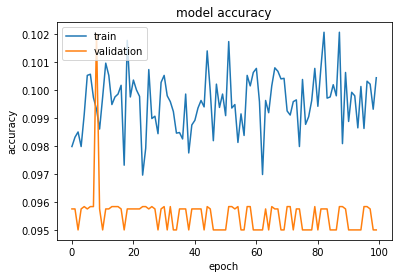

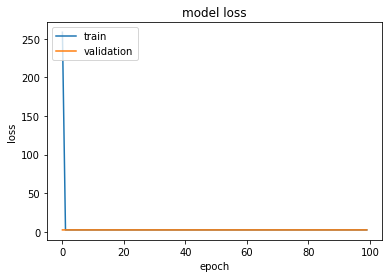

In [ ]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Adam**

In [ ]:
model = Sequential()
#Input Layer
model.add(Dense(16, activation='relu', input_dim=(784)))  #16 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1500/1500 - 4s - loss: 2.0305 - accuracy: 0.3156 - val_loss: 1.5069 - val_accuracy: 0.4005 - 4s/epoch - 3ms/step
Epoch 2/100
1500/1500 - 3s - loss: 1.3893 - accuracy: 0.4349 - val_loss: 1.2356 - val_accuracy: 0.4704 - 3s/epoch - 2ms/step
Epoch 3/100
1500/1500 - 3s - loss: 1.0948 - accuracy: 0.5300 - val_loss: 0.9432 - val_accuracy: 0.6068 - 3s/epoch - 2ms/step
Epoch 4/100
1500/1500 - 3s - loss: 0.9339 - accuracy: 0.6052 - val_loss: 0.9054 - val_accuracy: 0.6202 - 3s/epoch - 2ms/step
Epoch 5/100
1500/1500 - 3s - loss: 0.8858 - accuracy: 0.6211 - val_loss: 0.8666 - val_accuracy: 0.6383 - 3s/epoch - 2ms/step
Epoch 6/100
1500/1500 - 4s - loss: 0.8702 - accuracy: 0.6286 - val_loss: 0.8794 - val_accuracy: 0.6250 - 4s/epoch - 2ms/step
Epoch 7/100
1500/1500 - 3s - loss: 0.8605 - accuracy: 0.6293 - val_loss: 0.8953 - val_accuracy: 0.6274 - 3s/epoch - 2ms/step
Epoch 8/100
1500/1500 - 3s - loss: 0.8606 - accuracy: 0.6316 - val_loss: 0.8428 - val_accuracy: 0.6463 - 3s/epoch - 2ms/step


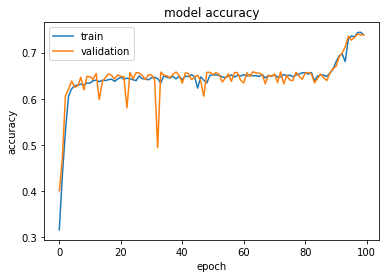

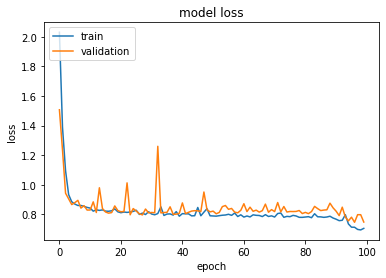

In [ ]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
#Input Layer
model.add(Dense(32, activation='relu', input_dim=(784)))  #32 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 32 is added for 32 neurons
#784 x 32 = weights x neurons = 25,088 + 32 biases = 25120
#dense 32 x dense_1 32 + 32 biases = 1056
#dense_1 32 x dense_2 32 + 32 biases = 1056 
#dense_2 32 x dense_3 10 + 32 biases = 330
#Total Biases & Weights/Params = 27,562 are updated, each time in Backpropagation

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1500/1500 - 4s - loss: 1.5440 - accuracy: 0.6639 - val_loss: 0.6814 - val_accuracy: 0.7606 - 4s/epoch - 3ms/step
Epoch 2/100
1500/1500 - 3s - loss: 0.6695 - accuracy: 0.7664 - val_loss: 0.6133 - val_accuracy: 0.7891 - 3s/epoch - 2ms/step
Epoch 3/100
1500/1500 - 3s - loss: 0.5932 - accuracy: 0.7918 - val_loss: 0.6692 - val_accuracy: 0.7701 - 3s/epoch - 2ms/step
Epoch 4/100
1500/1500 - 3s - loss: 0.5531 - accuracy: 0.8073 - val_loss: 0.5171 - val_accuracy: 0.8180 - 3s/epoch - 2ms/step
Epoch 5/100
1500/1500 - 3s - loss: 0.5136 - accuracy: 0.8207 - val_loss: 0.4774 - val_accuracy: 0.8298 - 3s/epoch - 2ms/step
Epoch 6/100
1500/1500 - 3s - loss: 0.4919 - accuracy: 0.8254 - val_loss: 0.5660 - val_accuracy: 0.8001 - 3s/epoch - 2ms/step
Epoch 7/100
1500/1500 - 3s - loss: 0.4726 - accuracy: 0.8306 - val_loss: 0.4716 - val_accuracy: 0.8328 - 3s/epoch - 2ms/step
Epoch 8/100
1500/1500 - 3s - loss: 0.4516 - accuracy: 0.8385 - val_loss: 0.4711 - val_accuracy: 0.8347 - 3s/epoch - 2ms/step


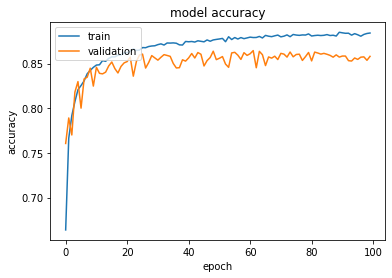

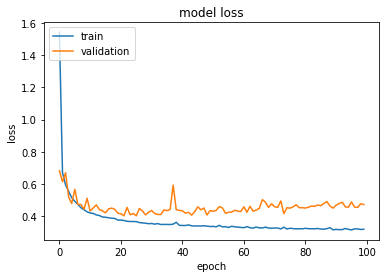

In [ ]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
#Input Layer
model.add(Dense(64, activation='relu', input_dim=(784)))  #64 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 64 is added for 64 neurons
#784 x 64 = weights x neurons = 50,176 + 64 biases = 59,210
#dense 64 x dense_1 64 + 64 biases = 4160
#dense_1 64 x dense_2 64 + 64 biases = 4160 
#dense_2 64 x dense_3 10 + 64 biases = 650
#Total Biases & Weights/Params = 59,210 are updated, each time in Backpropagation

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1500/1500 - 5s - loss: 1.3925 - accuracy: 0.7086 - val_loss: 0.6300 - val_accuracy: 0.7727 - 5s/epoch - 3ms/step
Epoch 2/100
1500/1500 - 4s - loss: 0.5946 - accuracy: 0.7922 - val_loss: 0.5669 - val_accuracy: 0.8108 - 4s/epoch - 2ms/step
Epoch 3/100
1500/1500 - 3s - loss: 0.5287 - accuracy: 0.8154 - val_loss: 0.4795 - val_accuracy: 0.8284 - 3s/epoch - 2ms/step
Epoch 4/100
1500/1500 - 4s - loss: 0.4690 - accuracy: 0.8336 - val_loss: 0.4733 - val_accuracy: 0.8314 - 4s/epoch - 2ms/step
Epoch 5/100
1500/1500 - 3s - loss: 0.4472 - accuracy: 0.8399 - val_loss: 0.4905 - val_accuracy: 0.8301 - 3s/epoch - 2ms/step
Epoch 6/100
1500/1500 - 3s - loss: 0.4288 - accuracy: 0.8449 - val_loss: 0.4122 - val_accuracy: 0.8546 - 3s/epoch - 2ms/step
Epoch 7/100
1500/1500 - 4s - loss: 0.4133 - accuracy: 0.8526 - val_loss: 0.4740 - val_accuracy: 0.8342 - 4s/epoch - 2ms/step
Epoch 8/100
1500/1500 - 3s - loss: 0.3969 - accuracy: 0.8569 - val_loss: 0.4145 - val_accuracy: 0.8429 - 3s/epoch - 2ms/step


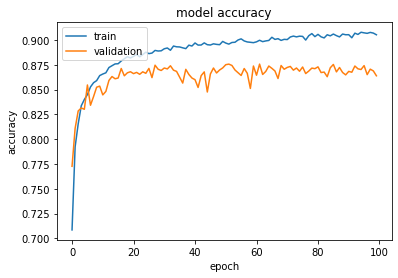

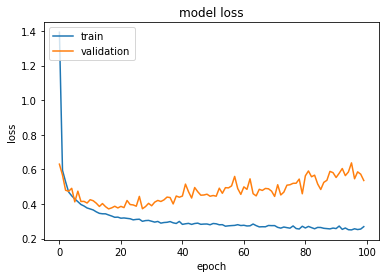

In [ ]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
#Input Layer
model.add(Dense(128, activation='relu', input_dim=(784)))  #128 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dropout(0.2))  #Layer that drops neurons to avoid overfitting (20% neurons rate)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 128 is added for 128 neurons
#784 x 128 = weights x neurons = 100,352 + 128 biases = 100480
#dense 128 x dense_1 128 + 128 biases = 16512
#dense_1 128 x dense_2 128 + 128 biases = 16512 
#dense_2 128 x dense_3 10 + 128 biases = 1290
#Total Biases & Weights/Params = 134,794 are updated, each time in Backpropagation

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 10)               

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1500/1500 - 6s - loss: 2.3889 - accuracy: 0.4791 - val_loss: 0.9492 - val_accuracy: 0.6035 - 6s/epoch - 4ms/step
Epoch 2/100
1500/1500 - 5s - loss: 1.0529 - accuracy: 0.5783 - val_loss: 0.8283 - val_accuracy: 0.6415 - 5s/epoch - 3ms/step
Epoch 3/100
1500/1500 - 5s - loss: 0.9547 - accuracy: 0.6041 - val_loss: 0.8241 - val_accuracy: 0.6408 - 5s/epoch - 3ms/step
Epoch 4/100
1500/1500 - 5s - loss: 0.9121 - accuracy: 0.6160 - val_loss: 0.7763 - val_accuracy: 0.6607 - 5s/epoch - 3ms/step
Epoch 5/100
1500/1500 - 5s - loss: 0.8947 - accuracy: 0.6226 - val_loss: 0.7649 - val_accuracy: 0.6647 - 5s/epoch - 3ms/step
Epoch 6/100
1500/1500 - 5s - loss: 0.8807 - accuracy: 0.6247 - val_loss: 0.7594 - val_accuracy: 0.6637 - 5s/epoch - 3ms/step
Epoch 7/100
1500/1500 - 5s - loss: 0.8721 - accuracy: 0.6260 - val_loss: 0.7701 - val_accuracy: 0.6627 - 5s/epoch - 3ms/step
Epoch 8/100
1500/1500 - 5s - loss: 0.8627 - accuracy: 0.6299 - val_loss: 0.7546 - val_accuracy: 0.6582 - 5s/epoch - 3ms/step


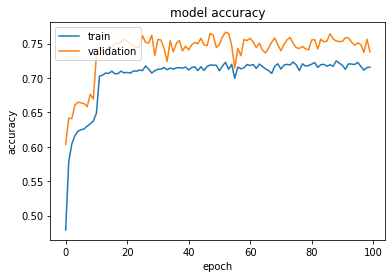

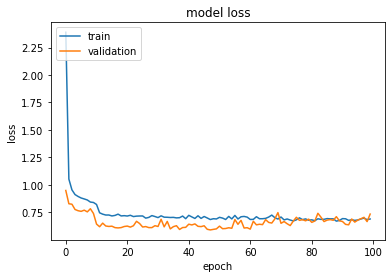

In [ ]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
#Input Layer
model.add(Dense(256, activation='relu', input_dim=(784)))  #256 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dropout(0.2))  #Layer that drops neurons to avoid overfitting (20% neurons rate)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 256 is added for 256 neurons
#784 x 256 = weights x neurons = 200,704 + 256 biases = 200960
#dense 256 x dense_1 256 + 256 biases = 65792
#dense_1 256 x dense_2 256 + 256 biases = 65792 
#dense_2 256 x dense_3 10 + 256 biases = 2570
#Total Biases & Weights/Params = 335,114 are updated, each time in Backpropagation

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 10)               

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1500/1500 - 9s - loss: 2.1012 - accuracy: 0.6293 - val_loss: 0.6729 - val_accuracy: 0.7380 - 9s/epoch - 6ms/step
Epoch 2/100
1500/1500 - 8s - loss: 0.7888 - accuracy: 0.7020 - val_loss: 0.6292 - val_accuracy: 0.7442 - 8s/epoch - 5ms/step
Epoch 3/100
1500/1500 - 8s - loss: 0.7403 - accuracy: 0.7230 - val_loss: 0.5725 - val_accuracy: 0.7754 - 8s/epoch - 5ms/step
Epoch 4/100
1500/1500 - 8s - loss: 0.7064 - accuracy: 0.7417 - val_loss: 0.6654 - val_accuracy: 0.7533 - 8s/epoch - 5ms/step
Epoch 5/100
1500/1500 - 8s - loss: 0.6784 - accuracy: 0.7521 - val_loss: 0.5273 - val_accuracy: 0.8008 - 8s/epoch - 5ms/step
Epoch 6/100
1500/1500 - 8s - loss: 0.6516 - accuracy: 0.7627 - val_loss: 0.5567 - val_accuracy: 0.7999 - 8s/epoch - 5ms/step
Epoch 7/100
1500/1500 - 8s - loss: 0.6513 - accuracy: 0.7635 - val_loss: 0.5488 - val_accuracy: 0.7999 - 8s/epoch - 5ms/step
Epoch 8/100
1500/1500 - 8s - loss: 0.6407 - accuracy: 0.7673 - val_loss: 0.5307 - val_accuracy: 0.8058 - 8s/epoch - 5ms/step


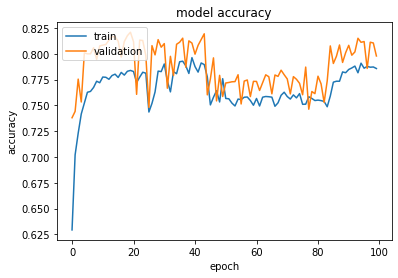

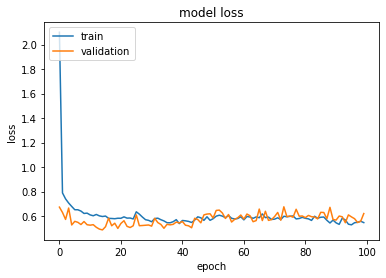

In [ ]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
#Input Layer
model.add(Dense(256, activation='relu', input_dim=(784)))  #256 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dense_25 (Dense)            (None, 256)               65792     
                                                                 
 dense_26 (Dense)            (None, 256)               65792     
                                                                 
 dense_27 (Dense)            (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1500/1500 - 9s - loss: 1.6571 - accuracy: 0.7439 - val_loss: 0.6490 - val_accuracy: 0.7816 - 9s/epoch - 6ms/step
Epoch 2/100
1500/1500 - 8s - loss: 0.5345 - accuracy: 0.8131 - val_loss: 0.4677 - val_accuracy: 0.8351 - 8s/epoch - 6ms/step
Epoch 3/100
1500/1500 - 9s - loss: 0.4640 - accuracy: 0.8342 - val_loss: 0.5100 - val_accuracy: 0.8240 - 9s/epoch - 6ms/step
Epoch 4/100
1500/1500 - 8s - loss: 0.4305 - accuracy: 0.8445 - val_loss: 0.4920 - val_accuracy: 0.8246 - 8s/epoch - 5ms/step
Epoch 5/100
1500/1500 - 8s - loss: 0.4174 - accuracy: 0.8515 - val_loss: 0.4041 - val_accuracy: 0.8482 - 8s/epoch - 5ms/step
Epoch 6/100
1500/1500 - 7s - loss: 0.3913 - accuracy: 0.8592 - val_loss: 0.4199 - val_accuracy: 0.8444 - 7s/epoch - 5ms/step
Epoch 7/100
1500/1500 - 8s - loss: 0.3849 - accuracy: 0.8616 - val_loss: 0.3865 - val_accuracy: 0.8583 - 8s/epoch - 5ms/step
Epoch 8/100
1500/1500 - 8s - loss: 0.3721 - accuracy: 0.8676 - val_loss: 0.4511 - val_accuracy: 0.8351 - 8s/epoch - 5ms/step


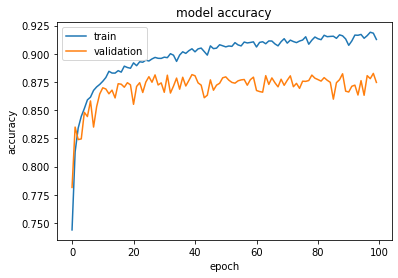

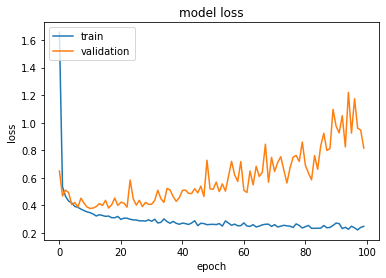

In [ ]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_final = test.drop('label', axis=1)
preds_final = model.predict(test_final)
preds_final

array([[9.69953179e-01, 4.55013833e-05, 2.17585130e-05, ...,
        0.00000000e+00, 1.97408512e-09, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.13343194e-01, 3.16470306e-07, 6.66672647e-01, ...,
        0.00000000e+00, 6.75194059e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.64947949e-08, 2.62071415e-17, 9.87655305e-11, ...,
        0.00000000e+00, 9.99996543e-01, 0.00000000e+00],
       [1.21997928e-05, 9.99448001e-01, 7.12191645e-13, ...,
        0.00000000e+00, 2.78098742e-06, 0.00000000e+00]], dtype=float32)

In [ ]:
preds_final.shape

(10000, 10)

In [ ]:
preds_final_class = pd.DataFrame(np.argmax(preds_final, axis=1))
preds_final_class

,0
0,0
1,1
2,2
3,6
4,3
...,...
9995,0
9996,6
9997,8
9998,8


In [ ]:
preds_final_class['Label'] = test['label']
preds_final_class.columns = ['Predicted', 'Actual']
preds_final_class

,Predicted,Actual
0,0,0
1,1,1
2,2,2
3,6,2
4,3,3
...,...,...
9995,0,0
9996,6,6
9997,8,8
9998,8,8
